     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0              6      148             72             35        0  33.6  \
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
562            1       87             68             34       77  37.6   
563            6       99             60             19       54  26.9   
564            0       91             80              0        0  32.4   
565            2       95             54             14       88  26.1   
566            1       99             72             30       18  38.6   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


c:\Users\vlva8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\vlva8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\vlva8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

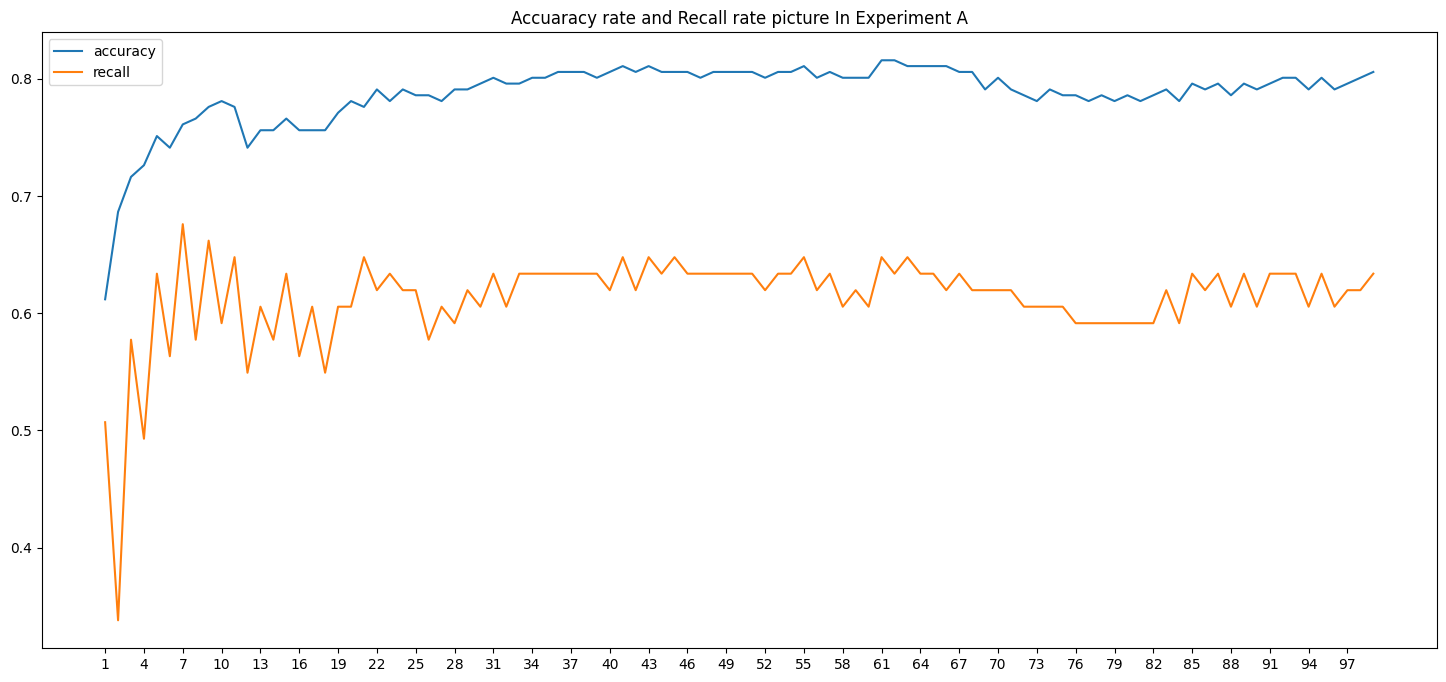

Accuracy(tree = 50): 0.8059701492537313
Recall(tree = 50): 0.6338028169014085


In [3]:
#實驗A
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#讀取資料
fp = pd.read_csv("train_data.csv")
fn = pd.read_csv("test_data.csv")

#Set up training data
#means it will select all rows,    “: -1 ” means that it will ignore last column
#as feature
X = fp.iloc[:,:-1]
# ” : ” means it will select all rows,    “-1 : ” means that it will ignore all columns except the last one
#as classification outcome
y = fp.iloc [:, -1] 

#創造 random forest 的訓練的模型
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)

#Set up test data
X_t = fn.iloc[:,:-1]
Y_t = fn.iloc[:,-1]
predictions = rf_model.predict(X_t) #把test丟進訓練模型預測

from sklearn.metrics import accuracy_score, recall_score

def graph():
    
    ACC = []
    REC = []
    k = [i for i in range(1,100,1)]
    for i in k:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
        rf_model = RandomForestClassifier(n_estimators= i , max_features="auto", random_state=44)
        rf_model.fit(X_train, y_train)
    
        predictions = rf_model.predict(X_t) #把test丟進訓練模型預測
        # 計算準確率
        ACC.append( accuracy_score(Y_t, predictions) )
        
        # 計算召回率
        REC.append( recall_score(Y_t, predictions) )
    
    plt.figure(figsize=(18, 8))
    plt.title("Accuaracy rate and Recall rate picture In Experiment A")
    plt.xticks(np.arange(1, 100, 3)) # 改變x軸的步長為1
    plt.plot(k,ACC, label = "accuracy")
    plt.plot(k,REC , label = "recall")
    plt.legend() #show line label
    plt.show()

graph()

# 計算準確率
accuracy = accuracy_score(Y_t, predictions)
print("Accuracy(tree = 50):", accuracy)
# 計算召回率
recall = recall_score(Y_t, predictions)
print("Recall(tree = 50):", recall)